**DOWNLOAD IMPORTANT LIBRARY**

In [1]:
# Install important libraries
!pip install optuna catboost xgboost plotly lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


DOWNLOAD RAW DATA JSON FILES

In [2]:
# Download fire data zip file from Google Drive using gdown (fuzzy matching is enabled)
!gdown --fuzzy "https://drive.google.com/file/d/1o23cobXA8XYcuaufad8dkWimZMPtwPdY/view?usp=drive_link"
# Unzip the downloaded file
!unzip "/content/su_sar_moisture_content-20250112T190910Z-001.zip"

Streaming output truncated to the last 5000 lines.
  inflating: su_sar_moisture_content/su_sar_moisture_content_1197/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1458/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1917/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0011/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_2484/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1296/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1296/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_1557/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0110/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_0729/stac.json  
  inflating: su_sar_moisture_content/su_sar_moisture_content_2187/labels.geojson  
  inflating: su_sar_moisture_content/su_sar_moisture_con

In [3]:
# Go into downloaded forder
%cd /content/su_sar_moisture_content
!ls

/content/su_sar_moisture_content
collection.json		      su_sar_moisture_content_0872  su_sar_moisture_content_1745
_common			      su_sar_moisture_content_0873  su_sar_moisture_content_1746
su_sar_moisture_content_0001  su_sar_moisture_content_0874  su_sar_moisture_content_1747
su_sar_moisture_content_0002  su_sar_moisture_content_0875  su_sar_moisture_content_1748
su_sar_moisture_content_0003  su_sar_moisture_content_0876  su_sar_moisture_content_1749
su_sar_moisture_content_0004  su_sar_moisture_content_0877  su_sar_moisture_content_1750
su_sar_moisture_content_0005  su_sar_moisture_content_0878  su_sar_moisture_content_1751
su_sar_moisture_content_0006  su_sar_moisture_content_0879  su_sar_moisture_content_1752
su_sar_moisture_content_0007  su_sar_moisture_content_0880  su_sar_moisture_content_1753
su_sar_moisture_content_0008  su_sar_moisture_content_0881  su_sar_moisture_content_1754
su_sar_moisture_content_0009  su_sar_moisture_content_0882  su_sar_moisture_content_1755
su_sar_mo

CREATE COMBINED DATAFRAME FROM RAW DATA

In [4]:
import pandas as pd
import os

# Define the base path for your files
base_path = '/content/su_sar_moisture_content'


# Function to process and merge files
def process_files(start, end, folder_prefix, base_path):
    # Read the first JSON file
    file_path = os.path.join(base_path, 'su_sar_moisture_content_0001', 'labels.geojson')
    df = pd.read_json(file_path)
    df = df.T
    df['type'][1] = df['type'][2]
    df['coordinates'][1] = df['coordinates'][2]
    df = df.drop(['type', 'geometry'])
    df = df.dropna(axis=1)
    df_merged = pd.DataFrame().reindex_like(df)

    for i in range(start, end):
        # Construct the file path dynamically
        folder_name = f'{folder_prefix}_{str(i).zfill(4)}'
        file_path = os.path.join(base_path, folder_name, 'labels.geojson')
        if os.path.exists(file_path):
            df = pd.read_json(file_path)
            df = df.T
            df['type'][1] = df['type'][2]
            df['coordinates'][1] = df['coordinates'][2]
            df = df.drop(['type', 'geometry'])
            df = df.dropna(axis=1)
            df_merged = pd.concat([df, df_merged])
        else:
            print(f"File not found: {file_path}")
    return df_merged

# Create merged data frames for different ranges
df_merged1 = process_files(1, 10, 'su_sar_moisture_content', base_path)
df_merged2 = process_files(10, 100, 'su_sar_moisture_content', base_path)
df_merged3 = process_files(100, 1000, 'su_sar_moisture_content', base_path)
df_merged4 = process_files(1000, 2616, 'su_sar_moisture_content', base_path)

# Combine all data frames and drop NaN values
df_merged = pd.concat([df_merged1, df_merged2, df_merged3, df_merged4])
df_merged = df_merged.dropna()
df_merged['date']=pd.to_datetime(df_merged['date'])
df_merged=df_merged.sort_values(by='date')
df_merged.set_index('date', inplace=True)
df_merged.to_csv("/content/su_sar_moisture_content.csv")

# Display the final merged DataFrame
df_merged


Streaming output truncated to the last 5000 lines.
  df['type'][1] = df['type'][2]
<ipython-input-4-be42f64eb7f4>:27: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df['type'][1] = df['type'][2]
<ipython-input-4-be42f64eb7f4>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['coordinates'][1] = df['coordinates'][2]
<ipython-input-4-be42f64eb7f4>:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will neve

,percent(t),site,slope(t),elevation(t),canopy_height(t),forest_cover(t),silt(t),sand(t),clay(t),vv(t),...,vh_green(t-3),vh_blue(t-3),vh_swir(t-3),vh_nir(t-3),vh_ndvi(t-3),vh_ndwi(t-3),vh_nirv(t-3),vh_vv(t-3),type,coordinates
date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,150.666667,Great Divide,0.82335,2176.0,0.0,140.0,19.0,65.0,16.0,-13.406858,...,-0.011424,-0.012656,-0.00952,-0.008342,-92.056431,847.243596,-0.060305,-7.911011,Point,"[-107.8536111, 40.7575]"
2015-06-30,113.0,D07_Cimarron River,0.867365,1037.0,8.0,140.0,49.0,23.0,28.0,-11.467708,...,-0.022369,-0.030546,-0.007236,-0.011129,-89.832345,95.372903,-0.049397,-7.005054,Point,"[-101.9038889, 37.12055556]"
2015-06-30,184.333333,Squaw Peak,10.14787,2034.0,23.0,140.0,38.0,42.0,20.0,-2.705159,...,-0.012028,-0.016215,-0.004372,-0.005435,-38.037932,98.001466,-0.019467,-7.249351,Point,"[-111.625, 40.30111111]"
2015-06-30,73.166667,Los Alamos,1.629689,915.0,13.0,110.0,20.0,67.0,13.0,-8.305405,...,-0.016877,-0.024498,-0.00676,-0.007288,-44.129067,398.293979,-0.021555,-8.205378,Point,"[-118.8186111, 34.70138889]"
2015-06-30,106.0,D07_Cimarron South,0.144942,1028.0,0.0,30.0,16.0,75.0,9.0,-13.08707,...,-0.028164,-0.037641,-0.007885,-0.013206,-96.592422,94.337008,-0.053716,-8.917826,Point,"[-101.6708333, 37.07361111]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,243.0,RGPL_Dimmit_TX,0.26373,186.0,4.0,140.0,17.0,70.0,13.0,-11.371539,...,-0.020372,-0.039701,-0.005555,-0.006122,-31.541664,364.592988,-0.013008,-4.87439,Point,"[-99.39416667, 28.3]"
2019-01-31,94.0,NOTX_Hood_TX,0.223147,228.0,0.0,140.0,22.0,61.0,17.0,-10.408519,...,-0.027975,-0.046888,-0.008906,-0.007488,-29.093055,-192.406971,-0.013087,-6.048708,Point,"[-97.82416667, 32.45777778]"
2019-01-31,203.5,"Trippet Ranch, Topanga",2.421903,324.0,24.0,70.0,37.0,39.0,24.0,-7.477246,...,-0.031832,-0.042221,-0.010008,-0.009477,-27.244698,-517.120618,-0.01831,-5.823875,Point,"[-118.5977778, 34.09333333]"


**ADDING GOOGLE EARTH ENGINE DATA**

In [9]:
%cd /content

/content


In [10]:
# Getting coordinates (latitude and longitude) to download data
df_merged = pd.read_csv("/content/su_sar_moisture_content.csv")
count= df_merged.coordinates.value_counts()
count_df = count.reset_index()
count_df.columns = ['coordinates', 'count']
lon =[]
lat=[]
for row in count_df.coordinates:
    print(row)
    lst= row.split(',')
    print(lst)
    lon.append(lst[0][1:])
    lat.append(lst[1][:-1])
# print(lat)
# print(lon)
import numpy as np
lon=np.array(lon,dtype=float)
lat=np.array(lat,dtype=float)
count_df.insert(0,'lon',lon)
count_df.insert(1,'lat',lat)
count_df.head()

[-118.7102778, 34.30638889]
['[-118.7102778', ' 34.30638889]']
[-118.5977778, 34.09333333]
['[-118.5977778', ' 34.09333333]']
[-118.5944444, 34.51]
['[-118.5944444', ' 34.51]']
[-118.8822222, 34.17166667]
['[-118.8822222', ' 34.17166667]']
[-120.445, 35.19333333]
['[-120.445', ' 35.19333333]']
[-117.865, 34.16527778]
['[-117.865', ' 34.16527778]']
[-118.8186111, 34.70138889]
['[-118.8186111', ' 34.70138889]']
[-120.0763889, 35.10888889]
['[-120.0763889', ' 35.10888889]']
[-118.8625, 34.08444444]
['[-118.8625', ' 34.08444444]']
[-95.25194444, 32.76277778]
['[-95.25194444', ' 32.76277778]']
[-121.8516667, 37.91361111]
['[-121.8516667', ' 37.91361111]']
[-119.3097222, 34.67833333]
['[-119.3097222', ' 34.67833333]']
[-119.8055556, 34.51194444]
['[-119.8055556', ' 34.51194444]']
[-121.9538889, 37.21083333]
['[-121.9538889', ' 37.21083333]']
[-118.9108333, 34.47138889]
['[-118.9108333', ' 34.47138889]']
[-98.55722222, 32.86555556]
['[-98.55722222', ' 32.86555556]']
[-117.5166667, 33.5]
['[-1

,lon,lat,coordinates,count
0,-118.710278,34.306389,"[-118.7102778, 34.30638889]",36
1,-118.597778,34.093333,"[-118.5977778, 34.09333333]",36
2,-118.594444,34.510000,"[-118.5944444, 34.51]",36
3,-118.882222,34.171667,"[-118.8822222, 34.17166667]",35
4,-120.445000,35.193333,"[-120.445, 35.19333333]",35


In [11]:
import ee

# Trigger the authentication flow.
ee.Authenticate(auth_mode= 'notebook')

# Initialize the library.
ee.Initialize()

# Import the MODIS land cover collection.
lc = ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY_AGGR")

# Initial date of interest (inclusive).
i_date = '2015-06-01'

# Final date of interest (exclusive).
f_date = '2019-02-01'

# Selection of appropriate bands and dates for LST.
lc = lc.select('dewpoint_temperature_2m','temperature_2m','skin_temperature','soil_temperature_level_1','soil_temperature_level_2','soil_temperature_level_3','soil_temperature_level_4','lake_bottom_temperature','lake_ice_depth','lake_ice_temperature','lake_mix_layer_depth','lake_mix_layer_temperature','lake_shape_factor','lake_total_layer_temperature','snow_albedo','snow_cover','snow_density','snow_depth','snow_depth_water_equivalent','snowfall_sum','snowmelt_sum','temperature_of_snow_layer','skin_reservoir_content','volumetric_soil_water_layer_1','volumetric_soil_water_layer_2','volumetric_soil_water_layer_3','volumetric_soil_water_layer_4','forecast_albedo','surface_latent_heat_flux_sum','surface_net_solar_radiation_sum','surface_net_thermal_radiation_sum','surface_sensible_heat_flux_sum','surface_solar_radiation_downwards_sum','surface_thermal_radiation_downwards_sum','evaporation_from_bare_soil_sum','evaporation_from_open_water_surfaces_excluding_oceans_sum','evaporation_from_the_top_of_canopy_sum','evaporation_from_vegetation_transpiration_sum','potential_evaporation_sum','runoff_sum','snow_evaporation_sum','sub_surface_runoff_sum','surface_runoff_sum','total_evaporation_sum','u_component_of_wind_10m','v_component_of_wind_10m','surface_pressure','total_precipitation_sum','leaf_area_index_high_vegetation','leaf_area_index_low_vegetation').filterDate(i_date, f_date)


u_lon = 73.85
u_lat = 18.52
u_poi = ee.Geometry.Point(u_lon, u_lat)

scale = 1000  # scale in meters


# Print the land cover type at the point.
lc_urban_point = lc.first().sample(u_poi, scale).first().get('skin_temperature').getInfo()
print('Land cover value at urban point is:', lc_urban_point)


# Get the data for the pixel intersecting the point in urban area.
lst_u_poi = lc.getRegion(u_poi, scale).getInfo()


# Preview the result.
print(lst_u_poi[:5])

import pandas as pd

def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime','longitude', 'latitude',  *list_of_bands]]

    return df

lst_df_urban = ee_array_to_df(lst_u_poi,['dewpoint_temperature_2m','temperature_2m','skin_temperature','soil_temperature_level_1','soil_temperature_level_2','soil_temperature_level_3','soil_temperature_level_4','lake_bottom_temperature','lake_ice_depth','lake_ice_temperature','lake_mix_layer_depth','lake_mix_layer_temperature','lake_shape_factor','lake_total_layer_temperature','snow_albedo','snow_cover','snow_density','snow_depth','snow_depth_water_equivalent','snowfall_sum','snowmelt_sum','temperature_of_snow_layer','skin_reservoir_content','volumetric_soil_water_layer_1','volumetric_soil_water_layer_2','volumetric_soil_water_layer_3','volumetric_soil_water_layer_4','forecast_albedo','surface_latent_heat_flux_sum','surface_net_solar_radiation_sum','surface_net_thermal_radiation_sum','surface_sensible_heat_flux_sum','surface_solar_radiation_downwards_sum','surface_thermal_radiation_downwards_sum','evaporation_from_bare_soil_sum','evaporation_from_open_water_surfaces_excluding_oceans_sum','evaporation_from_the_top_of_canopy_sum','evaporation_from_vegetation_transpiration_sum','potential_evaporation_sum','runoff_sum','snow_evaporation_sum','sub_surface_runoff_sum','surface_runoff_sum','total_evaporation_sum','u_component_of_wind_10m','v_component_of_wind_10m','surface_pressure','total_precipitation_sum','leaf_area_index_high_vegetation','leaf_area_index_low_vegetation'])



print(lst_df_urban.head())
print(lst_df_urban.tail())
df=pd.DataFrame(columns=lst_df_urban.columns)
import numpy as np
import os
import pandas as pd
rf =count_df
rf=rf.round(decimals=2)

for j in range(0,rf.shape[0]):

        lc = ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY_AGGR")
        # Initial date of interest (inclusive).
        i_date = '2015-06-01'

        # Final date of interest (exclusive).
        f_date = '2019-02-01'
        # Selection of appropriate bands and dates for LST.
        lc = lc.select('dewpoint_temperature_2m','temperature_2m','skin_temperature','soil_temperature_level_1','soil_temperature_level_2','soil_temperature_level_3','soil_temperature_level_4','lake_bottom_temperature','lake_ice_depth','lake_ice_temperature','lake_mix_layer_depth','lake_mix_layer_temperature','lake_shape_factor','lake_total_layer_temperature','snow_albedo','snow_cover','snow_density','snow_depth','snow_depth_water_equivalent','snowfall_sum','snowmelt_sum','temperature_of_snow_layer','skin_reservoir_content','volumetric_soil_water_layer_1','volumetric_soil_water_layer_2','volumetric_soil_water_layer_3','volumetric_soil_water_layer_4','forecast_albedo','surface_latent_heat_flux_sum','surface_net_solar_radiation_sum','surface_net_thermal_radiation_sum','surface_sensible_heat_flux_sum','surface_solar_radiation_downwards_sum','surface_thermal_radiation_downwards_sum','evaporation_from_bare_soil_sum','evaporation_from_open_water_surfaces_excluding_oceans_sum','evaporation_from_the_top_of_canopy_sum','evaporation_from_vegetation_transpiration_sum','potential_evaporation_sum','runoff_sum','snow_evaporation_sum','sub_surface_runoff_sum','surface_runoff_sum','total_evaporation_sum','u_component_of_wind_10m','v_component_of_wind_10m','surface_pressure','total_precipitation_sum','leaf_area_index_high_vegetation','leaf_area_index_low_vegetation').filterDate(i_date, f_date)
        u_lon = rf.lon[j]
        u_lat = rf.lat[j]
        u_poi = ee.Geometry.Point(u_lon, u_lat)
        scale = 1000  # scale in meters
        lst_u_poi = lc.getRegion(u_poi, scale).getInfo()
        # Preview the result.
        lst_df_urban = ee_array_to_df(lst_u_poi,['dewpoint_temperature_2m','temperature_2m','skin_temperature','soil_temperature_level_1','soil_temperature_level_2','soil_temperature_level_3','soil_temperature_level_4','lake_bottom_temperature','lake_ice_depth','lake_ice_temperature','lake_mix_layer_depth','lake_mix_layer_temperature','lake_shape_factor','lake_total_layer_temperature','snow_albedo','snow_cover','snow_density','snow_depth','snow_depth_water_equivalent','snowfall_sum','snowmelt_sum','temperature_of_snow_layer','skin_reservoir_content','volumetric_soil_water_layer_1','volumetric_soil_water_layer_2','volumetric_soil_water_layer_3','volumetric_soil_water_layer_4','forecast_albedo','surface_latent_heat_flux_sum','surface_net_solar_radiation_sum','surface_net_thermal_radiation_sum','surface_sensible_heat_flux_sum','surface_solar_radiation_downwards_sum','surface_thermal_radiation_downwards_sum','evaporation_from_bare_soil_sum','evaporation_from_open_water_surfaces_excluding_oceans_sum','evaporation_from_the_top_of_canopy_sum','evaporation_from_vegetation_transpiration_sum','potential_evaporation_sum','runoff_sum','snow_evaporation_sum','sub_surface_runoff_sum','surface_runoff_sum','total_evaporation_sum','u_component_of_wind_10m','v_component_of_wind_10m','surface_pressure','total_precipitation_sum','leaf_area_index_high_vegetation','leaf_area_index_low_vegetation'])
        print(lst_df_urban.head())
        print(lst_df_urban.tail())
        df=pd.concat([df,lst_df_urban])

        print(j)
df.to_csv('data_download.csv',index=False)


Land cover value at urban point is: 299.26561421288386
[['id', 'longitude', 'latitude', 'time', 'dewpoint_temperature_2m', 'temperature_2m', 'skin_temperature', 'soil_temperature_level_1', 'soil_temperature_level_2', 'soil_temperature_level_3', 'soil_temperature_level_4', 'lake_bottom_temperature', 'lake_ice_depth', 'lake_ice_temperature', 'lake_mix_layer_depth', 'lake_mix_layer_temperature', 'lake_shape_factor', 'lake_total_layer_temperature', 'snow_albedo', 'snow_cover', 'snow_density', 'snow_depth', 'snow_depth_water_equivalent', 'snowfall_sum', 'snowmelt_sum', 'temperature_of_snow_layer', 'skin_reservoir_content', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4', 'forecast_albedo', 'surface_latent_heat_flux_sum', 'surface_net_solar_radiation_sum', 'surface_net_thermal_radiation_sum', 'surface_sensible_heat_flux_sum', 'surface_solar_radiation_downwards_sum', 'surface_thermal_radiation_downwards_sum', '

<ipython-input-11-030c036bdaba>:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat([df,lst_df_urban])


Streaming output truncated to the last 5000 lines.
0            time   datetime   longitude   latitude  dewpoint_temperature_2m  \
39  1535760000000 2018-09-01 -123.100635  39.126122               280.944156   
40  1538352000000 2018-10-01 -123.100635  39.126122               280.838910   
41  1541030400000 2018-11-01 -123.100635  39.126122               275.363606   
42  1543622400000 2018-12-01 -123.100635  39.126122               276.931323   
43  1546300800000 2019-01-01 -123.100635  39.126122               277.654869   

0   temperature_2m  skin_temperature  soil_temperature_level_1  \
39      292.555225        292.456679                293.189439   
40      288.701397        288.284572                289.038216   
41      284.789348        284.414463                285.279608   
42      280.199071        279.639395                280.543483   
43      280.700426        280.270585                280.630372   

0   soil_temperature_level_2  soil_temperature_level_3  ...  \
39      

**MERGING ORIGINAL RAW DATA AND GEE DATA**

In [12]:
df = pd.read_csv("/content/data_download.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df['latitude'] = df['latitude'].astype(float).round(2)
df['longitude'] = df['longitude'].astype(float).round(2)
df.head()

,time,datetime,longitude,latitude,dewpoint_temperature_2m,temperature_2m,skin_temperature,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,...,snow_evaporation_sum,sub_surface_runoff_sum,surface_runoff_sum,total_evaporation_sum,u_component_of_wind_10m,v_component_of_wind_10m,surface_pressure,total_precipitation_sum,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation
0,1433116800000,2015-06-01,-118.71,34.31,285.020956,295.436773,302.096661,302.124192,300.653769,297.282845,...,5.587935e-09,5.513430e-07,5.990267e-06,-0.006592,0.467601,1.146286,95365.020779,0.001883,4.999313,2.726554
1,1435708800000,2015-07-01,-118.71,34.31,288.036365,295.464902,302.246819,302.561215,301.872177,299.978235,...,6.984919e-10,4.768372e-07,3.561378e-05,-0.013572,0.452997,1.278134,95524.289357,0.010953,4.998420,2.655005
2,1438387200000,2015-08-01,-118.71,34.31,286.986472,297.826487,304.176675,304.462410,303.615807,301.411775,...,4.423782e-09,4.619360e-07,1.341105e-07,-0.002300,0.500647,1.014971,95457.871215,0.000071,4.995081,2.601107
3,1441065600000,2015-09-01,-118.71,34.31,287.404625,296.669947,300.910100,301.372855,301.292421,301.024780,...,3.492460e-09,4.470348e-07,1.202300e-04,-0.022804,0.270124,0.600870,95349.957932,0.026924,4.994507,2.555338
4,1443657600000,2015-10-01,-118.71,34.31,282.877494,294.001216,296.564258,297.175758,297.688171,298.838699,...,1.164153e-09,4.619360e-07,6.256253e-05,-0.019735,0.083950,-0.506212,95469.527533,0.017794,4.994507,2.527567


In [13]:
# Adjust dates to the last day of the month
df['datetime'] = df['datetime'] + pd.offsets.MonthEnd(0)

df.head()

,time,datetime,longitude,latitude,dewpoint_temperature_2m,temperature_2m,skin_temperature,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,...,snow_evaporation_sum,sub_surface_runoff_sum,surface_runoff_sum,total_evaporation_sum,u_component_of_wind_10m,v_component_of_wind_10m,surface_pressure,total_precipitation_sum,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation
0,1433116800000,2015-06-30,-118.71,34.31,285.020956,295.436773,302.096661,302.124192,300.653769,297.282845,...,5.587935e-09,5.513430e-07,5.990267e-06,-0.006592,0.467601,1.146286,95365.020779,0.001883,4.999313,2.726554
1,1435708800000,2015-07-31,-118.71,34.31,288.036365,295.464902,302.246819,302.561215,301.872177,299.978235,...,6.984919e-10,4.768372e-07,3.561378e-05,-0.013572,0.452997,1.278134,95524.289357,0.010953,4.998420,2.655005
2,1438387200000,2015-08-31,-118.71,34.31,286.986472,297.826487,304.176675,304.462410,303.615807,301.411775,...,4.423782e-09,4.619360e-07,1.341105e-07,-0.002300,0.500647,1.014971,95457.871215,0.000071,4.995081,2.601107
3,1441065600000,2015-09-30,-118.71,34.31,287.404625,296.669947,300.910100,301.372855,301.292421,301.024780,...,3.492460e-09,4.470348e-07,1.202300e-04,-0.022804,0.270124,0.600870,95349.957932,0.026924,4.994507,2.555338
4,1443657600000,2015-10-31,-118.71,34.31,282.877494,294.001216,296.564258,297.175758,297.688171,298.838699,...,1.164153e-09,4.619360e-07,6.256253e-05,-0.019735,0.083950,-0.506212,95469.527533,0.017794,4.994507,2.527567


In [14]:
df_merged = pd.read_csv("/content/su_sar_moisture_content.csv")
df_merged.head()

,date,percent(t),site,slope(t),elevation(t),canopy_height(t),forest_cover(t),silt(t),sand(t),clay(t),...,vh_green(t-3),vh_blue(t-3),vh_swir(t-3),vh_nir(t-3),vh_ndvi(t-3),vh_ndwi(t-3),vh_nirv(t-3),vh_vv(t-3),type,coordinates
0,2015-06-30,150.666667,Great Divide,0.823350,2176.0,0.0,140.0,19.0,65.0,16.0,...,-0.011424,-0.012656,-0.009520,-0.008342,-92.056431,847.243596,-0.060305,-7.911011,Point,"[-107.8536111, 40.7575]"
1,2015-06-30,113.000000,D07_Cimarron River,0.867365,1037.0,8.0,140.0,49.0,23.0,28.0,...,-0.022369,-0.030546,-0.007236,-0.011129,-89.832345,95.372903,-0.049397,-7.005054,Point,"[-101.9038889, 37.12055556]"
2,2015-06-30,184.333333,Squaw Peak,10.147870,2034.0,23.0,140.0,38.0,42.0,20.0,...,-0.012028,-0.016215,-0.004372,-0.005435,-38.037932,98.001466,-0.019467,-7.249351,Point,"[-111.625, 40.30111111]"
3,2015-06-30,73.166667,Los Alamos,1.629689,915.0,13.0,110.0,20.0,67.0,13.0,...,-0.016877,-0.024498,-0.006760,-0.007288,-44.129067,398.293979,-0.021555,-8.205378,Point,"[-118.8186111, 34.70138889]"
4,2015-06-30,106.000000,D07_Cimarron South,0.144942,1028.0,0.0,30.0,16.0,75.0,9.0,...,-0.028164,-0.037641,-0.007885,-0.013206,-96.592422,94.337008,-0.053716,-8.917826,Point,"[-101.6708333, 37.07361111]"


In [15]:
lon=[]
lat=[]

for i in range(0,df_merged.shape[0]):
    s=list(df_merged.coordinates[i].split(','))
    x=float(s[0][1:])
    lon.append(x)
    y=float(s[1][:-1])
    lat.append(y)

df_merged.insert(0,'latitude',lat)
df_merged.insert(0,'longitude',lon)
df_merged = df_merged.reset_index(drop=True)
df_merged = df_merged.rename(columns={'date': 'datetime'})
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
df_merged['latitude'] = df_merged['latitude'].astype(float).round(2)
df_merged['longitude'] = df_merged['longitude'].astype(float).round(2)
df_merged.head()

,longitude,latitude,datetime,percent(t),site,slope(t),elevation(t),canopy_height(t),forest_cover(t),silt(t),...,vh_green(t-3),vh_blue(t-3),vh_swir(t-3),vh_nir(t-3),vh_ndvi(t-3),vh_ndwi(t-3),vh_nirv(t-3),vh_vv(t-3),type,coordinates
0,-107.85,40.76,2015-06-30,150.666667,Great Divide,0.823350,2176.0,0.0,140.0,19.0,...,-0.011424,-0.012656,-0.009520,-0.008342,-92.056431,847.243596,-0.060305,-7.911011,Point,"[-107.8536111, 40.7575]"
1,-101.90,37.12,2015-06-30,113.000000,D07_Cimarron River,0.867365,1037.0,8.0,140.0,49.0,...,-0.022369,-0.030546,-0.007236,-0.011129,-89.832345,95.372903,-0.049397,-7.005054,Point,"[-101.9038889, 37.12055556]"
2,-111.62,40.30,2015-06-30,184.333333,Squaw Peak,10.147870,2034.0,23.0,140.0,38.0,...,-0.012028,-0.016215,-0.004372,-0.005435,-38.037932,98.001466,-0.019467,-7.249351,Point,"[-111.625, 40.30111111]"
3,-118.82,34.70,2015-06-30,73.166667,Los Alamos,1.629689,915.0,13.0,110.0,20.0,...,-0.016877,-0.024498,-0.006760,-0.007288,-44.129067,398.293979,-0.021555,-8.205378,Point,"[-118.8186111, 34.70138889]"
4,-101.67,37.07,2015-06-30,106.000000,D07_Cimarron South,0.144942,1028.0,0.0,30.0,16.0,...,-0.028164,-0.037641,-0.007885,-0.013206,-96.592422,94.337008,-0.053716,-8.917826,Point,"[-101.6708333, 37.07361111]"


In [16]:
# Merge the dataframes
fire_data = pd.merge(df_merged, df, on=['latitude', 'longitude', 'datetime'], how='inner')
fire_data

,longitude,latitude,datetime,percent(t),site,slope(t),elevation(t),canopy_height(t),forest_cover(t),silt(t),...,snow_evaporation_sum,sub_surface_runoff_sum,surface_runoff_sum,total_evaporation_sum,u_component_of_wind_10m,v_component_of_wind_10m,surface_pressure,total_precipitation_sum,leaf_area_index_high_vegetation,leaf_area_index_low_vegetation
0,-107.85,40.76,2015-06-30,150.666667,Great Divide,0.823350,2176.0,0.0,140.0,19.0,...,5.587935e-09,6.769747e-04,0.000070,-0.039600,0.523130,0.767367,78646.229112,0.010347,0.000000,0.551583
1,-101.90,37.12,2015-06-30,113.000000,D07_Cimarron River,0.867365,1037.0,8.0,140.0,49.0,...,5.820766e-09,5.364418e-07,0.000399,-0.104569,0.439995,2.931864,89343.094390,0.053299,0.000000,1.118370
2,-111.62,40.30,2015-06-30,184.333333,Squaw Peak,10.147870,2034.0,23.0,140.0,38.0,...,5.587935e-09,6.596521e-04,0.000558,-0.106061,-0.083297,0.045436,80367.134668,0.016251,4.355761,1.440010
3,-118.82,34.70,2015-06-30,73.166667,Los Alamos,1.629689,915.0,13.0,110.0,20.0,...,5.587935e-09,8.940697e-07,0.000040,-0.028563,0.655911,0.072628,88948.576335,0.010888,4.286987,2.315610
4,-101.67,37.07,2015-06-30,106.000000,D07_Cimarron South,0.144942,1028.0,0.0,30.0,16.0,...,5.820766e-09,4.991889e-07,0.002146,-0.111588,0.384695,3.153505,89840.648557,0.064401,0.000000,1.205858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,-99.39,28.30,2019-01-31,243.000000,RGPL_Dimmit_TX,0.263730,186.0,4.0,140.0,17.0,...,2.095476e-09,2.898276e-06,0.000128,-0.039590,-0.922135,-0.127430,100079.977088,0.014356,0.000000,0.950817
2611,-97.82,32.46,2019-01-31,94.000000,NOTX_Hood_TX,0.223147,228.0,0.0,140.0,22.0,...,-2.219994e-05,7.619113e-04,0.001538,-0.039480,0.617973,0.310249,98906.529507,0.037052,4.791106,0.882022
2612,-118.60,34.09,2019-01-31,203.500000,"Trippet Ranch, Topanga",2.421903,324.0,24.0,70.0,37.0,...,2.561137e-09,1.547359e-03,0.010629,-0.050219,-0.609521,-0.745550,99110.877625,0.169440,3.489806,2.561048
2613,-121.11,39.30,2019-01-31,94.500000,Reader Ranch,4.243574,552.0,24.0,100.0,25.0,...,1.043720e-03,1.846756e-01,0.024859,-0.036905,-1.051642,0.380051,93458.385690,0.328174,2.256071,2.050659


In [17]:
fire_data.to_csv("/content/fire_data.csv",index=False)

PREPROCESS DATA FOR ML TASK

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics
import optuna

# Ensure TensorFlow is using GPU
print("TensorFlow GPU Available:", tf.config.list_physical_devices('GPU'))

# Load data
data = pd.read_csv("/content/fire_data.csv")
data[data==-999]=np.nan
# Ensure columns with numeric data are handled for mean calculation
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Fill NaN values only in numeric columns with the column mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Prepare data
y = data['percent(t)'].values
X = data.drop(['percent(t)', 'datetime', 'type', 'coordinates', 'site','time'], axis=1).values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

train_x, valid_x, train_y, valid_y = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


TensorFlow GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


LIGHT GBM MODEL

In [19]:
# LightGBM Model with CPU
def lightgbm_objective(trial):
    dtrain = lgb.Dataset(train_x, label=train_y)
    param = {
        "objective": "regression",
        "metric": "RMSE",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "device": "cpu",  # Enable GPU
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

# Run Optuna for each model
lightgbm_study = optuna.create_study(direction="minimize")
lightgbm_study.optimize(lightgbm_objective, n_trials=500)

# Print best results
print("LightGBM Best Trial:")
print(lightgbm_study.best_trial)

[I 2025-01-15 18:45:11,457] A new study created in memory with name: no-name-551dc68b-3818-498a-bfff-1c9f31a320d6
[I 2025-01-15 18:45:12,356] Trial 0 finished with value: 19.432991130082872 and parameters: {'lambda_l1': 0.0034051275770031315, 'lambda_l2': 1.703519868106767e-08, 'num_leaves': 227, 'feature_fraction': 0.7007066107733952, 'bagging_fraction': 0.6828094892986796, 'bagging_freq': 2, 'min_child_samples': 41}. Best is trial 0 with value: 19.432991130082872.
[I 2025-01-15 18:45:13,108] Trial 1 finished with value: 19.446347358136304 and parameters: {'lambda_l1': 0.0005189901532676874, 'lambda_l2': 0.0002676890138044494, 'num_leaves': 58, 'feature_fraction': 0.6158766680690306, 'bagging_fraction': 0.9885548975608143, 'bagging_freq': 5, 'min_child_samples': 55}. Best is trial 0 with value: 19.432991130082872.
[I 2025-01-15 18:45:13,655] Trial 2 finished with value: 19.35128893860696 and parameters: {'lambda_l1': 0.008783483933013802, 'lambda_l2': 5.991160272510978e-06, 'num_leave

LightGBM Best Trial:
FrozenTrial(number=349, state=TrialState.COMPLETE, values=[17.85104859433635], datetime_start=datetime.datetime(2025, 1, 15, 18, 58, 22, 250306), datetime_complete=datetime.datetime(2025, 1, 15, 18, 58, 25, 338956), params={'lambda_l1': 8.75256148191774e-08, 'lambda_l2': 1.5520733638163978e-08, 'num_leaves': 66, 'feature_fraction': 0.8183266272892027, 'bagging_fraction': 0.9029610150243277, 'bagging_freq': 2, 'min_child_samples': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_fraction': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'bagging_freq': IntDistribution(high=7, log=False, low=1, step=1), 'min_child_samples': IntDi

In [20]:
# Prediction and plotting part
best_params = lightgbm_study.best_trial.params
gbm = lgb.LGBMRegressor(**best_params)
gbm.fit(train_x, train_y, eval_metric='rmse')

# Predictions
preds = gbm.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE: 17.85104859433635
RMSE_percent: 17.170066291756527
R2Score: 0.7894808066330743


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


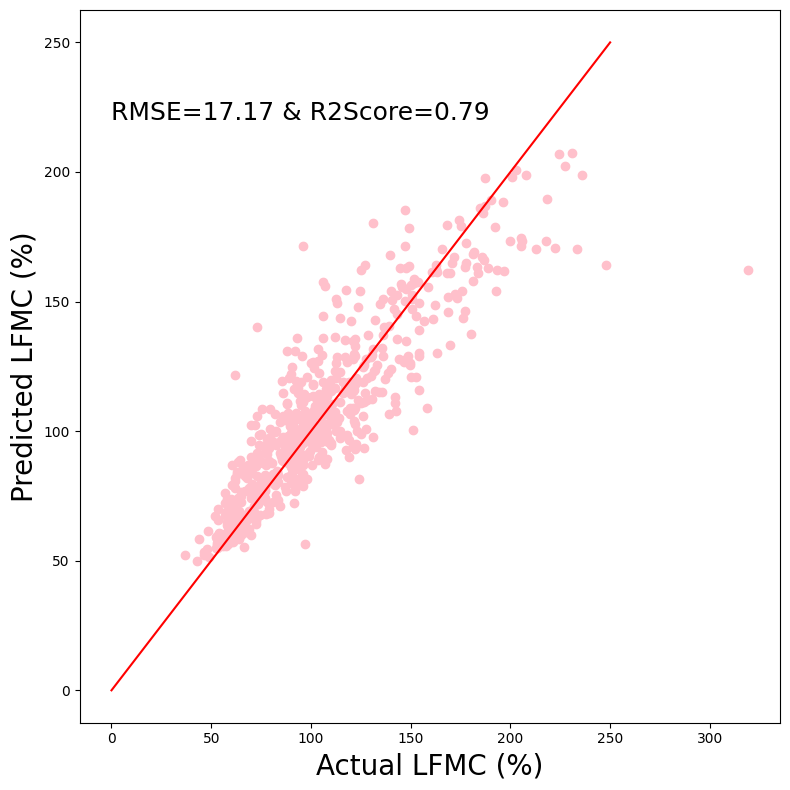

In [21]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(valid_y, preds, color='pink')
x = np.arange(0, 300, 50)
y = np.arange(0, 300, 50)
plt.plot(x, y, color='red')
plt.text(0, 220, f'RMSE={RMSE_percent:.2f} & R2Score={r2score:.2f}', fontsize=18)
plt.xlabel('Actual LFMC (%)', fontsize=20)
plt.ylabel('Predicted LFMC (%)', fontsize=20)
plt.tight_layout()
plt.show()



In [26]:
import plotly.express as px
data = pd.read_csv("/content/fire_data.csv")
# Reset index to make 'date' a regular column
data.reset_index(drop=True, inplace=True)
# Convert the 'date' column to datetime format with the correct format
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
# Set the 'date' column as the index
data.set_index('datetime', inplace=True)
data = data.loc['2018-09':'2018-09'].reset_index(drop=True)  # Select data for September 2018

y = data['percent(t)'].values
X = data.drop(['percent(t)', 'type', 'coordinates', 'site','time'], axis=1).values
X = scaler.transform(X)
pred = gbm.predict(X)
data.insert(0, 'Predicted LFMC', pred)  # Insert predicted LFMC into DataFrame

lon=[]
lat=[]

for i in range(0,data.shape[0]):
    s=list(data.coordinates[i].split(','))
    x=float(s[0][1:])
    lon.append(x)
    y=float(s[1][:-1])
    lat.append(y)

data.insert(141,'lat',lat)
data.insert(141,'lon',lon)

# Plot actual LFMC
color_scale = [(0, 'red'), (0.30, 'yellow'), (1, 'green')]  # Define color scale
fig = px.scatter_mapbox(data,
                        title='Actual LFMC for month Sep 2018',  # Update title to reflect correct month/year
                        lat="lat",
                        lon="lon",
                        hover_name="site",
                        range_color=(0, 300),
                        hover_data=["percent(t)"],  # Update hover data to use original column name
                        color="percent(t)",  # Update color to use original column name
                        color_continuous_scale=color_scale,
                        size="forest_cover(t)",
                        height=800,
                        zoom=4,
                        width=1000)
fig.update_layout(mapbox_style="open-street-map", autosize=True)
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [27]:
# Plot predicted LFMC
fig = px.scatter_mapbox(data,
                        lat="lat",
                        lon="lon",
                        range_color=(0, 300),
                        hover_name="site",
                        hover_data=["Predicted LFMC"],
                        color="Predicted LFMC",
                        color_continuous_scale=color_scale,
                        size="forest_cover(t)",
                        height=800,
                        zoom=4,
                        width=1000)
fig.update_layout(mapbox_style="open-street-map", autosize=True, title='Predicted LFMC for month Sep 2020')
fig.update_layout(margin={"r":0, "t":50, "l":0, "b":0})
fig.show()

CATBOOST MODEL

In [28]:
# CatBoost Model with GPU
def catboost_objective(trial):
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE"]),
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 1e0),
        # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),
        'rsm': 1.0,
        "task_type": "GPU",  # Enable GPU
        "devices": "0",  # Specify GPU device
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    model = CatBoostRegressor(**param)
    model.fit(train_x, train_y, verbose=0)
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

catboost_study = optuna.create_study(direction="minimize")
catboost_study.optimize(catboost_objective, n_trials=100)

print("CatBoost Best Trial:")
print(catboost_study.best_trial)

[I 2025-01-15 19:07:57,378] A new study created in memory with name: no-name-54e8c0c9-cc22-4b31-9651-d1469d473cf7
[I 2025-01-15 19:08:02,847] Trial 0 finished with value: 23.462489095941812 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.48641212439349113, 'l2_leaf_reg': 0.2867163682436609, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 9, 'one_hot_max_size': 7, 'bagging_temperature': 2.8979942623198562}. Best is trial 0 with value: 23.462489095941812.
[I 2025-01-15 19:09:47,129] Trial 1 finished with value: 19.066726367855622 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.21119563910792202, 'l2_leaf_reg': 0.0752496891167182, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'min_data_in_leaf': 7, 'one_hot_max_size': 2}. Best is trial 1 with value: 19.066726367855622.
[I 2025-01-15 19:09:52,410] Trial 2 finished with value: 23.136445702540822 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.

CatBoost Best Trial:
FrozenTrial(number=83, state=TrialState.COMPLETE, values=[17.57761237278143], datetime_start=datetime.datetime(2025, 1, 15, 19, 35, 4, 887257), datetime_complete=datetime.datetime(2025, 1, 15, 19, 35, 13, 779243), params={'loss_function': 'RMSE', 'learning_rate': 0.036816299727756296, 'l2_leaf_reg': 0.8625327179146584, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 14, 'one_hot_max_size': 2, 'bagging_temperature': 0.4594090278312024}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'loss_function': CategoricalDistribution(choices=('RMSE',)), 'learning_rate': FloatDistribution(high=1.0, log=False, low=1e-05, step=None), 'l2_leaf_reg': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'depth': IntDistribution(high=10, log=False, low=1, step=1), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'Bernoulli', 'MV

In [29]:
# Prediction and plotting part
best_params = catboost_study.best_trial.params
model = CatBoostRegressor(**best_params)
model.fit(train_x, train_y, verbose=0)

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")

RMSE: 17.83134795840534
RMSE_percent: 17.151117196237703
R2Score: 0.7899452133510729


MLP MODEL

In [30]:
# MLP Model with TensorFlow (GPU by default if available)
def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 1, 10)
    n_units = trial.suggest_int('n_units', 32, 512)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)

    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            model.add(Dense(n_units, activation='relu', input_shape=(train_x.shape[1],)))
        else:
            model.add(Dense(n_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

def mlp_objective(trial):
    model = create_mlp_model(trial)
    es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model.fit(train_x, train_y, epochs=100, batch_size=256, verbose=0, validation_split=0.2, callbacks=[es])
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

mlp_study = optuna.create_study(direction="minimize")
mlp_study.optimize(mlp_objective, n_trials=50)

print("MLP Best Trial:")
print(mlp_study.best_trial)

[I 2025-01-15 19:41:29,115] A new study created in memory with name: no-name-fdd50c4c-bce8-404b-badc-2acf6058c491
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:41:43,734] Trial 0 finished with value: 27.127306066673064 and parameters: {'n_layers': 3, 'n_units': 334, 'dropout_rate': 0.05921386050825156, 'lr': 0.00037888687251927985}. Best is trial 0 with value: 27.127306066673064.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:41:57,539] Trial 1 finished with value: 26.281830336850533 and parameters: {'n_layers': 4, 'n_units': 315, 'dropout_rate': 0.09273664012838267, 'lr': 0.00015530563971362404}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 61: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:42:16,135] Trial 2 finished with value: 32.420778380143986 and parameters: {'n_layers': 8, 'n_units': 302, 'dropout_rate': 0.14565492629189902, 'lr': 0.00019283285282789659}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 57: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:42:31,806] Trial 3 finished with value: 28.836652339526363 and parameters: {'n_layers': 5, 'n_units': 509, 'dropout_rate': 0.46187071455225703, 'lr': 0.001135004620949906}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 69: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:42:48,978] Trial 4 finished with value: 39.926799809415954 and parameters: {'n_layers': 7, 'n_units': 139, 'dropout_rate': 0.2434126851176992, 'lr': 0.0002022194913937828}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 81: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:43:02,995] Trial 5 finished with value: 39.37075632437238 and parameters: {'n_layers': 5, 'n_units': 159, 'dropout_rate': 0.2540511740437052, 'lr': 1.770850068861824e-05}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-01-15 19:43:12,400] Trial 6 finished with value: 38.33973654311935 and parameters: {'n_layers': 1, 'n_units': 331, 'dropout_rate': 0.08489713573954233, 'lr': 0.00018474318628346835}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-01-15 19:43:22,357] Trial 7 finished with value: 29.028005044886427 and parameters: {'n_layers': 1, 'n_units': 194, 'dropout_rate': 0.371163620254101, 'lr': 0.002370894982806417}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-15 19:43:43,962] Trial 8 finished with value: 33.67834192858158 and parameters: {'n_layers': 10, 'n_units': 123, 'dropout_rate': 0.03578931170089217, 'lr': 3.961573436141815e-05}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 26: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-15 19:44:00,539] Trial 9 finished with value: 50.97801614793235 and parameters: {'n_layers': 9, 'n_units': 110, 'dropout_rate': 0.28865329151674735, 'lr': 8.21525984338272e-05}. Best is trial 1 with value: 26.281830336850533.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 69: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:44:09,930] Trial 10 finished with value: 25.7315045849683 and parameters: {'n_layers': 3, 'n_units': 441, 'dropout_rate': 0.15824045562953812, 'lr': 0.006874774008606953}. Best is trial 10 with value: 25.7315045849683.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 92: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-15 19:44:22,568] Trial 11 finished with value: 23.56661359940101 and parameters: {'n_layers': 3, 'n_units': 459, 'dropout_rate': 0.16070341561571563, 'lr': 0.007600551776238137}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 55: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-15 19:44:38,454] Trial 12 finished with value: 28.643603264216548 and parameters: {'n_layers': 3, 'n_units': 474, 'dropout_rate': 0.1647736455488029, 'lr': 0.009505568877485243}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 42: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:44:48,096] Trial 13 finished with value: 30.82148436746101 and parameters: {'n_layers': 3, 'n_units': 422, 'dropout_rate': 0.20945338041456912, 'lr': 0.009581047915218766}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-15 19:44:59,293] Trial 14 finished with value: 25.359326758520403 and parameters: {'n_layers': 2, 'n_units': 423, 'dropout_rate': 0.3168014815078085, 'lr': 0.0020693484389801837}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-01-15 19:45:09,273] Trial 15 finished with value: 28.550960105105737 and parameters: {'n_layers': 1, 'n_units': 392, 'dropout_rate': 0.36824451546000697, 'lr': 0.002254899935004054}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-15 19:45:22,444] Trial 16 finished with value: 27.534806322116637 and parameters: {'n_layers': 2, 'n_units': 241, 'dropout_rate': 0.3394733186356211, 'lr': 0.0008956269085719944}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 17: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:45:33,872] Trial 17 finished with value: 63.36593994457803 and parameters: {'n_layers': 6, 'n_units': 382, 'dropout_rate': 0.46392722520539864, 'lr': 0.0035174857337841843}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 18: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:45:41,905] Trial 18 finished with value: 41.252770908539546 and parameters: {'n_layers': 4, 'n_units': 50, 'dropout_rate': 0.2872343643845432, 'lr': 0.0009282564400851812}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 90: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-15 19:45:52,582] Trial 19 finished with value: 28.485973708871786 and parameters: {'n_layers': 2, 'n_units': 507, 'dropout_rate': 0.4087951257292206, 'lr': 0.004224203653793212}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 79: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:46:07,701] Trial 20 finished with value: 24.09462062158197 and parameters: {'n_layers': 6, 'n_units': 374, 'dropout_rate': 0.21248312907202838, 'lr': 0.0005027052757755468}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 53: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:46:23,615] Trial 21 finished with value: 27.531908072821007 and parameters: {'n_layers': 6, 'n_units': 371, 'dropout_rate': 0.2097973470393608, 'lr': 0.0005562590069438447}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 30: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:46:40,593] Trial 22 finished with value: 36.465466066913756 and parameters: {'n_layers': 7, 'n_units': 434, 'dropout_rate': 0.30751828158973415, 'lr': 0.0016914897472683251}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 76: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:46:53,223] Trial 23 finished with value: 24.5402911354478 and parameters: {'n_layers': 4, 'n_units': 464, 'dropout_rate': 0.11863461685428661, 'lr': 0.003634437710451896}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 92: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:47:06,648] Trial 24 finished with value: 27.816393573624374 and parameters: {'n_layers': 4, 'n_units': 475, 'dropout_rate': 0.12448943555805086, 'lr': 0.00473358977427847}. Best is trial 11 with value: 23.56661359940101.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 93: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:47:24,739] Trial 25 finished with value: 21.351242190052968 and parameters: {'n_layers': 5, 'n_units': 261, 'dropout_rate': 0.009278421648638596, 'lr': 0.00569071030384189}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:47:44,603] Trial 26 finished with value: 37.38706529974286 and parameters: {'n_layers': 7, 'n_units': 258, 'dropout_rate': 0.021436958234014314, 'lr': 1.1694170779626728e-05}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-15 19:47:59,097] Trial 27 finished with value: 24.404512200559587 and parameters: {'n_layers': 5, 'n_units': 207, 'dropout_rate': 0.0038833395807775124, 'lr': 0.0006178819521227605}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 74: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:48:16,041] Trial 28 finished with value: 30.534241639153823 and parameters: {'n_layers': 6, 'n_units': 355, 'dropout_rate': 0.2292586126892798, 'lr': 6.740618350108702e-05}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 77: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-15 19:48:36,802] Trial 29 finished with value: 26.30113150532803 and parameters: {'n_layers': 8, 'n_units': 285, 'dropout_rate': 0.06055329150493771, 'lr': 0.0003560906051714689}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 42: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:48:51,606] Trial 30 finished with value: 27.977180108155512 and parameters: {'n_layers': 5, 'n_units': 234, 'dropout_rate': 0.19887683737348058, 'lr': 0.006602280490885118}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-15 19:49:06,480] Trial 31 finished with value: 26.072217851264114 and parameters: {'n_layers': 5, 'n_units': 199, 'dropout_rate': 0.0035527661648398676, 'lr': 0.0005642185568401147}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-15 19:49:24,132] Trial 32 finished with value: 25.358248271675347 and parameters: {'n_layers': 4, 'n_units': 191, 'dropout_rate': 0.06484407439965975, 'lr': 0.0005714824157502698}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 84: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:49:43,843] Trial 33 finished with value: 23.537609773076163 and parameters: {'n_layers': 6, 'n_units': 306, 'dropout_rate': 0.03803362708046311, 'lr': 0.0016759455894403065}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 61: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-01-15 19:50:00,812] Trial 34 finished with value: 37.436190125447226 and parameters: {'n_layers': 8, 'n_units': 303, 'dropout_rate': 0.1173115712471795, 'lr': 0.005792045892566172}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 83: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-01-15 19:50:18,345] Trial 35 finished with value: 25.10717841408501 and parameters: {'n_layers': 7, 'n_units': 329, 'dropout_rate': 0.17520105549272813, 'lr': 0.0015655827957199026}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 80: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-15 19:50:36,814] Trial 36 finished with value: 25.78539217905505 and parameters: {'n_layers': 6, 'n_units': 277, 'dropout_rate': 0.09254724367181312, 'lr': 0.002748224264617058}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 91: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:50:52,332] Trial 37 finished with value: 24.073860210702236 and parameters: {'n_layers': 6, 'n_units': 349, 'dropout_rate': 0.029987456349711956, 'lr': 0.0011094812084353912}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 92: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2025-01-15 19:51:06,809] Trial 38 finished with value: 23.135007001261865 and parameters: {'n_layers': 5, 'n_units': 342, 'dropout_rate': 0.02998316493436, 'lr': 0.001283313783972949}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 69: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


[I 2025-01-15 19:51:20,595] Trial 39 finished with value: 24.917239071245906 and parameters: {'n_layers': 5, 'n_units': 315, 'dropout_rate': 0.04704164561415369, 'lr': 0.0013656884158492009}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:51:34,663] Trial 40 finished with value: 25.49235332286124 and parameters: {'n_layers': 4, 'n_units': 289, 'dropout_rate': 0.07688951414355277, 'lr': 0.00027609690365954236}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 79: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


[I 2025-01-15 19:51:49,436] Trial 41 finished with value: 23.698776328263875 and parameters: {'n_layers': 6, 'n_units': 334, 'dropout_rate': 0.03493271460754192, 'lr': 0.0012816338924436079}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 59: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-01-15 19:52:07,335] Trial 42 finished with value: 26.914586252758816 and parameters: {'n_layers': 7, 'n_units': 259, 'dropout_rate': 0.047252358158808204, 'lr': 0.002985577872777301}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 45: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:52:22,520] Trial 43 finished with value: 28.33900748979023 and parameters: {'n_layers': 5, 'n_units': 404, 'dropout_rate': 0.09940763286913412, 'lr': 0.005355751415168565}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 54: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-15 19:52:38,648] Trial 44 finished with value: 37.83574082662861 and parameters: {'n_layers': 7, 'n_units': 346, 'dropout_rate': 0.014048149219822531, 'lr': 0.007855961388621093}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 51: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-01-15 19:52:55,720] Trial 45 finished with value: 25.898667055679976 and parameters: {'n_layers': 9, 'n_units': 316, 'dropout_rate': 0.03202925224719554, 'lr': 0.0019300102446819058}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-15 19:53:14,541] Trial 46 finished with value: 25.49469171370146 and parameters: {'n_layers': 3, 'n_units': 223, 'dropout_rate': 0.06256664926553746, 'lr': 0.0012382676001266393}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-01-15 19:53:32,633] Trial 47 finished with value: 26.92913431535235 and parameters: {'n_layers': 5, 'n_units': 173, 'dropout_rate': 0.14139042119055067, 'lr': 0.00024456554467672443}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-01-15 19:53:46,207] Trial 48 finished with value: 26.83026157452612 and parameters: {'n_layers': 4, 'n_units': 260, 'dropout_rate': 0.09641277301100916, 'lr': 0.0007603491638856785}. Best is trial 25 with value: 21.351242190052968.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-01-15 19:53:57,580] Trial 49 finished with value: 30.841672752169025 and parameters: {'n_layers': 2, 'n_units': 409, 'dropout_rate': 0.0420377988598544, 'lr': 0.00015177561126933128}. Best is trial 25 with value: 21.351242190052968.


MLP Best Trial:
FrozenTrial(number=25, state=TrialState.COMPLETE, values=[21.351242190052968], datetime_start=datetime.datetime(2025, 1, 15, 19, 47, 6, 649935), datetime_complete=datetime.datetime(2025, 1, 15, 19, 47, 24, 738845), params={'n_layers': 5, 'n_units': 261, 'dropout_rate': 0.009278421648638596, 'lr': 0.00569071030384189}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_layers': IntDistribution(high=10, log=False, low=1, step=1), 'n_units': IntDistribution(high=512, log=False, low=32, step=1), 'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.0, step=None), 'lr': FloatDistribution(high=0.01, log=True, low=1e-05, step=None)}, trial_id=25, value=None)


In [31]:
# Prediction and plotting part
best_params = mlp_study.best_trial.params
model = create_mlp_model(optuna.trial.FixedTrial(best_params))
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.fit(train_x, train_y, epochs=100, batch_size=256, verbose=0, validation_split=0.2, callbacks=[es])

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 78: early stopping
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE: 23.242042366175
RMSE_percent: 22.355404281945187
R2Score: 0.6431277246807807


XGBOOST MODEL

In [ ]:
import xgboost as xgb

# XGBoost Model with GPU
def xgboost_objective(trial):
    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "tree_method": "gpu_hist",  # Enable GPU
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False)
    preds = model.predict(valid_x)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
    return rmse

# Run Optuna for XGBoost
xgboost_study = optuna.create_study(direction="minimize")
xgboost_study.optimize(xgboost_objective, n_trials=100)

# Print best results for XGBoost
print("XGBoost Best Trial:")
print(xgboost_study.best_trial)

[I 2025-01-15 20:02:00,954] A new study created in memory with name: no-name-c6c7f6d6-29d8-4e7c-a46f-898a0f95909c
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:02:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:02:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:02:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is runn

In [ ]:
# Prediction and plotting part
best_params = xgboost_study.best_trial.params
model = xgb.XGBRegressor(**best_params)
model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=False)

# Predictions
preds = model.predict(valid_x)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(valid_y, preds))
print(f"RMSE: {RMSE}")
RMSE_percent = (RMSE / np.mean(valid_y)) * 100
print(f"RMSE_percent: {RMSE_percent}")
r2score = sklearn.metrics.r2_score(valid_y, preds)
print(f"R2Score: {r2score}")
